<a href="https://colab.research.google.com/github/Sivateja-Varma/mycodes.py/blob/main/Linear%26Lasso_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/car data.csv')

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
dataset.shape

(301, 9)

In [ ]:
dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
dataset = dataset.replace({'Fuel_Type':{'Petrol':0 ,'Diesel':1, 'CNG':2},'Seller_Type':{'Dealer':0, 'Individual':1},'Transmission':{'Manual':0, 'Automatic':1}})


<ipython-input-34-0f494bdec5e7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'Fuel_Type':{'Petrol':0 ,'Diesel':1, 'CNG':2},'Seller_Type':{'Dealer':0, 'Individual':1},'Transmission':{'Manual':0, 'Automatic':1}})


In [ ]:
X = dataset.drop(columns=['Selling_Price','Car_Name'], axis=1)
Y = dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(X_train,Y_train)

LinearRegression()

In [ ]:
linear_prediction = linear.predict(X_test)
accuracy = metrics.r2_score(Y_test, linear_prediction)
print(accuracy)


0.8365766715027051


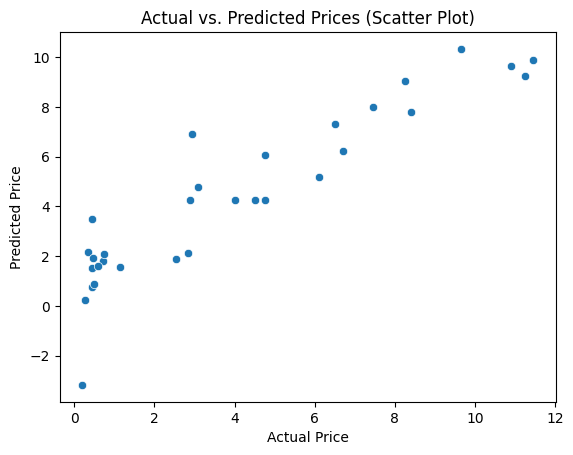

In [ ]:
sns.scatterplot(x=Y_test, y=linear_prediction) # Use sns.scatterplot() instead of plt.scatterplot()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Scatter Plot)") # Changed title to reflect scatter plot
plt.show()

In [ ]:
lasso = Lasso()
lasso.fit(X_train,Y_train)

Lasso()

In [ ]:
Lasso_prediction = lasso.predict(X_test)
accuracy = metrics.r2_score(Y_test, Lasso_prediction)
print(accuracy)

0.8709167941173195


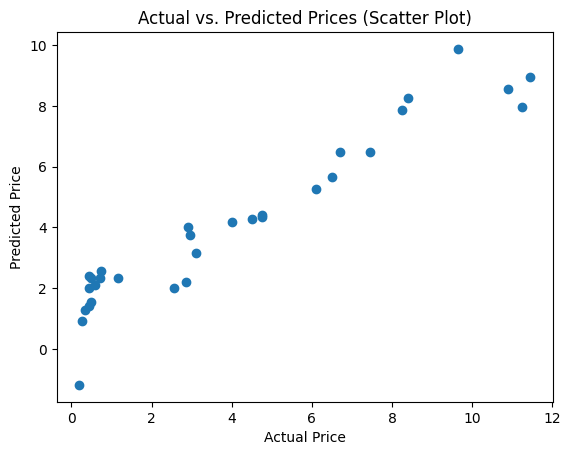

In [ ]:
plt.scatter(Y_test, Lasso_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Scatter Plot)")
plt.show()